In [3]:
import os
from md_diffusion import *
from msd_fft import calculate_diffusion_coefficient
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [4]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'
mol_name = 'DC_Cu110'

### Save numpy array and run diffusivity calcualtion

In [6]:
ALL_DATA = {}
for sim_type in ['temperature-flexible', 'temperature-rigid']:
    DATA = {}
    simdir = '%s/%s/%s' % (data_dir, sim_type, mol_name)
    for temperature in os.listdir(simdir):
        temp_simdir = os.path.join(simdir, temperature)
        pos_array = read_position_array(temp_simdir, directions=['x', 'y', 'z'], t_skip=2, log='log.%s' % mol_name)
        DATA[temperature] = calculate_diffusion_coefficient(pos_array, average_frames=1, fs_per_frame=1000)
    ALL_DATA[sim_type.split('-')[1]] = DATA

Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, '20': 19}
250 | Shape: (8001 frames, 20 runs, 3 dimensions) | Saved: None
Best fit: (1.20 - 3.20 ns; $R^2$ = 0.999):
D = 5.745E-05 $cm^2 / s$
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, '20': 19}
270 | Shape: (8001 frames, 20 runs, 3 dimensions) | Saved: None
Best fit: (0.80 - 3.20 ns; $R^2$ = 1.000):
D = 7.387E-05 $cm^2 / s$
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, '20': 19}
200 | Shape: (8001 frames, 20 runs, 3 dimensions) | Saved: None
Best fit: (1.20 - 3.20 ns; $R^2$ = 1.000):
D = 5.918E-05 $cm^2 / s$
Run ids:  {'1': 0, '2': 1, '

### Plot temperature vs diffusion

In [11]:
temperatures = sorted(list(DATA.keys()))
time_ranges = ['0.00-8.00', 'best']
colors = dict(rigid='#CF5955', y='#EAC658', dctst='#66AD9B', flexible='#4e7fad')
shades = dict(rigid='#672C2A', y='#75632C', dctst='#33564D', flexible='#3B4C5C')

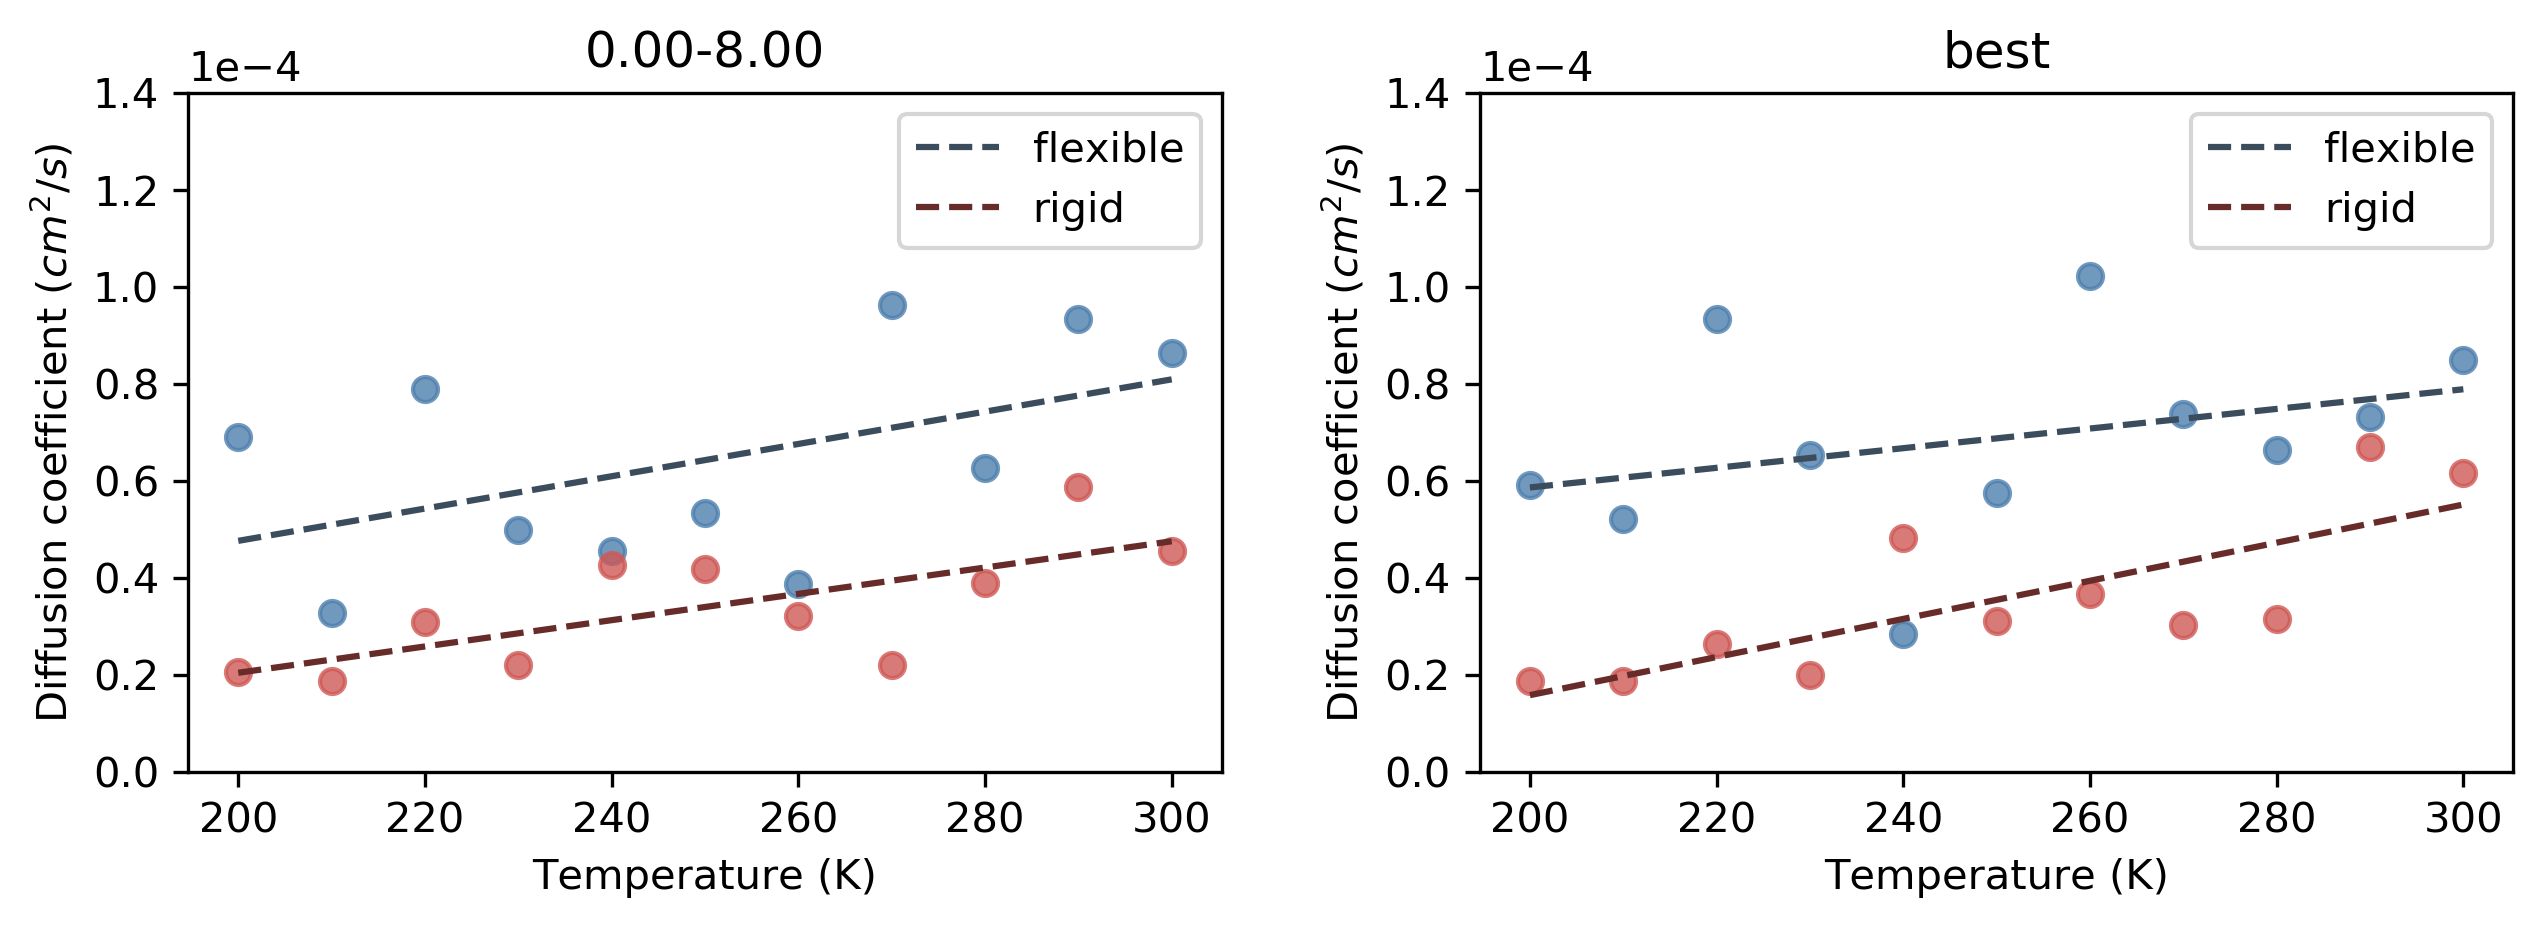

In [12]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(hspace=.35, wspace=.25)

for idx, r in enumerate(time_ranges, start=1):
    ax = fig.add_subplot(1, len(time_ranges), idx)
    
    # Plot diffusivity
    for sim_type in ['flexible', 'rigid']:
        diff = [ALL_DATA[sim_type][t][r]['cm2/s'] for t in temperatures]
        t = [int(i) for i in temperatures]
        ax.scatter(t, diff, c=colors[sim_type], alpha=0.8)
        # Fit
        fit_fn = np.poly1d(np.polyfit(t, diff,1)) 
        ax.plot(t, fit_fn(t), '--', c=shades[sim_type])
    ax.set_ylim(0, 1.4e-4)
    ax.set_title('%s' % r)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.legend(['flexible', 'rigid'])
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Diffusion coefficient $(cm^2 / s)$')